In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


In [3]:
df = df.filter(['borough','cuisine','name'])
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
dfmiss = df[df['borough']=='Missing']
dfmiss.count()

borough    51
cuisine    51
name       51
dtype: int64

In [4]:
import numpy as np
df = df.replace('Missing',np.NaN)
df[df['borough']==np.NaN]

,borough,cuisine,name


In [5]:
df = df.drop(df[df['borough']==np.NaN].index)
df[df['borough']==np.NaN]

,borough,cuisine,name


In [6]:
data = df.groupby('cuisine')['name'].count().sort_values(ascending=False)
data

cuisine
American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

In [7]:
df.groupby('cuisine')['name'].count()[df.groupby('cuisine')['name'].count()==df.groupby('cuisine')['name'].count().max()]

cuisine
American    6183
Name: name, dtype: int64

<BarContainer object of 10 artists>

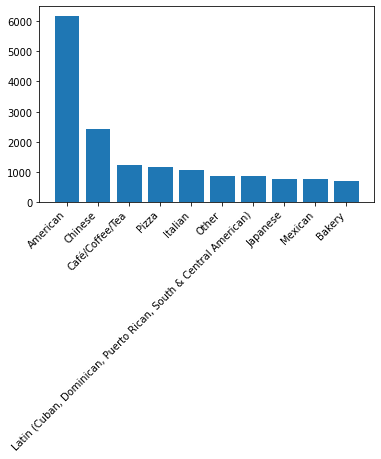

In [8]:
fig = plt.figure()
ax = plt.axes()

fig.autofmt_xdate(rotation=45)
ax.bar(data.head(10).index,data.head(10).values)

In [9]:
slices = df.groupby('borough')['name'].count()

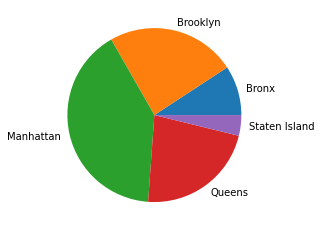

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.pie(slices.values,labels=slices.index)
plt.show()

([<matplotlib.patches.Wedge at 0x7f3f200c4590>,
 [Text(1.0540776617251624, 0.3145159503936392, 'Bronx'),
  Text(0.2570202851700509, 1.0695515756666931, 'Brooklyn'),
  Text(-1.0726320840524248, -0.24384505789815017, 'Manhattan'),
  Text(0.6472414913546378, -0.8894259113996087, 'Queens'),
  Text(1.092055363844366, -0.1319662165053988, 'Staten Island')])

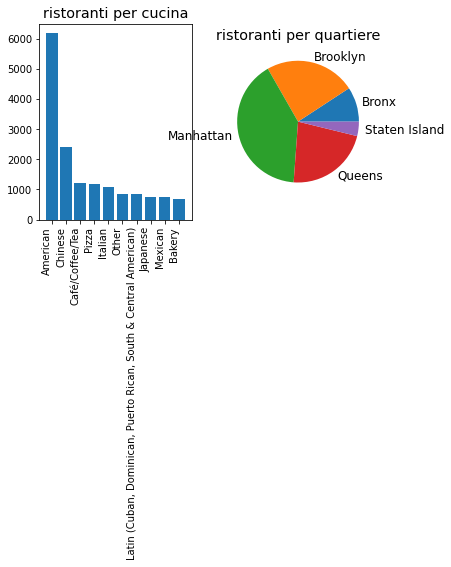

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plt.rcParams.update({'font.size': 12})
fig.autofmt_xdate(rotation='vertical')
ax1.set_title('ristoranti per cucina')
ax2.set_title('ristoranti per quartiere')

ax1.bar(data.head(10).index,data.head(10).values)
ax2.pie(slices.values,labels=slices.index)

In [12]:
df = df.replace(df[df['cuisine']!='American']['cuisine'].tolist(),'non American')
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


In [13]:
data = df.groupby(['borough','cuisine']).count()
data

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

In [22]:
pivt = data.unstack()
pivt['name']

cuisine,American,non American
borough,,
Bronx,411,1911
Brooklyn,1273,4773
Manhattan,3205,7006
Queens,1040,4575
Staten Island,244,719


In [26]:
df.pivot(index='borough',columns='cuisine')

ValueError: ignored

In [43]:
dati = pivt['name'].reset_index()
dati

cuisine,borough,American,non American
0,Bronx,411,1911
1,Brooklyn,1273,4773
2,Manhattan,3205,7006
3,Queens,1040,4575
4,Staten Island,244,719


<BarContainer object of 5 artists>

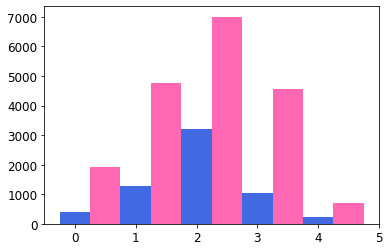

In [44]:
fig = plt.figure()
ax = plt.axes()

ax.bar(dati.index,dati['American'],width=0.5,color='royalblue')
ax.bar(dati.index+0.5,dati['non American'],width=0.5,color='hotpink')